In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m1, cov1 = [1, 5], [[1, 0.1], [0.1, 1]]
m2, cov2 = [4, 6], [[1, 0.1], [0.1, 0.2]]

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 500)

print(dist1.shape, dist2.shape)

(500, 2) (500, 2)


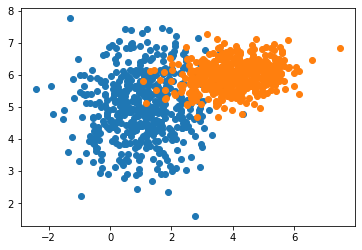

In [3]:
plt.scatter(dist1[:, 0], dist1[:, 1])
plt.scatter(dist2[:, 0], dist2[:, 1])

plt.show()

In [4]:
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1

print(data.shape)

(1000, 3)


In [7]:
np.random.shuffle(data)

In [8]:
data[:10]

array([[1.14913297, 6.5988098 , 0.        ],
       [0.63875557, 4.18903645, 0.        ],
       [5.80832554, 7.08594629, 1.        ],
       [3.89376868, 6.76163953, 1.        ],
       [0.57394666, 5.54984024, 0.        ],
       [2.87823065, 5.96003223, 1.        ],
       [1.60764129, 3.55194583, 0.        ],
       [4.96737581, 5.36137183, 1.        ],
       [5.08377514, 5.87182554, 1.        ],
       [1.97899478, 6.21589633, 0.        ]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(data[:, :2], data[:, -1])
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(750, 2) (750,)
(250, 2) (250,)


In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [12]:
def hypothesis(X, W, b):
    
    h = (X*W).sum() + b
    return sigmoid(h)

In [13]:
def log_likelihood(X, W, b, y):
    
    total = 0.0
    m = X.shape[0]
    
    for i in range(m):
        
        if y[i] == 0:
            total += np.log(1 - hypothesis(X[i], W, b))
        else:
            total += np.log(hypothesis(X[i], W, b))
            
    total /= m
    return total

In [15]:
def gradient_ascent(X, W, b, y, learning_rate = 0.1):
    m = X.shape[0]
    gradW = np.zeros(2)
    gradb = 0.0

    for i in range(m):

        gradW += (y[i] - hypothesis(X[i], W, b))*X[i]
        gradb += (y[i] - hypothesis(X[i], W, b))*1

    gradW /= m
    gradb /= m

    W += learning_rate*gradW
    b += learning_rate*gradb
    logs = log_likelihood(X, W, b, y)

    return W, b, logs

In [16]:
W = np.array([0.5, 0.5])
b = 2.5
logs_list = []

for i in range(500):
    W, b ,logs = gradient_ascent(xtrain, W, b, ytrain)
    logs_list.append(logs)
print(W)
print(b)

[ 2.2795202  -1.13791208]
0.7476960805207287


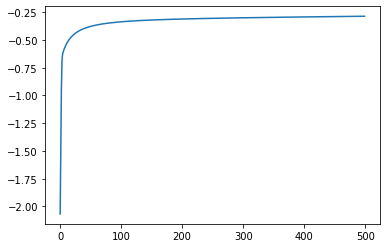

In [17]:
plt.plot(logs_list)
plt.show()

In [18]:
def predict(x, W, b):
    pred = hypothesis(x, W, b)
    if pred<0.5:
        return 0
    else:
        return 1
    

In [22]:
print(predict(xtest[200, :], W, b))

1


In [24]:
ytest[200]

1.0

In [25]:
def scores(Xtest, Ytest, W, b):
    preds = []
    m = Xtest.shape[0]
    
    for i in range(m):
        p = predict(Xtest[i], W ,b)
        preds.append(p)
    preds = np.asarray(preds)
    
    return (preds==Ytest).sum() *100/m

In [27]:
scores(xtest, ytest, W, b)

88.4

In [30]:
# count = 0
# for i in range(len(xtest)):
    
#     if ytest[i] == predict(xtest[i], W ,b):
#         count +=1

In [32]:
# print(count*100/(len(xtest)))

88.4


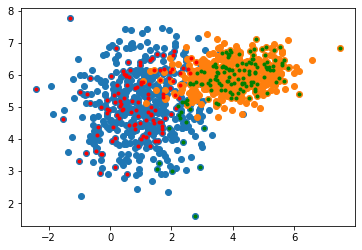

In [33]:
plt.scatter(dist1[:, 0], dist1[:, 1])
plt.scatter(dist2[:, 0], dist2[:, 1])

m = xtest.shape[0]

for i in range(m):
    x = xtest[i]
    p = predict(x, W, b)
    if p==0:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'g.')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [38]:
lr.score(xtest, ytest)

0.944

In [39]:
lr.predict(xtest)

array([1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1.